In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import matplotlib.ticker as mtick
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

df = pd.read_pickle("./cyl10to11.pkl") 
# get param set
paramsets =  pd.read_csv('../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
#outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
df['theta'] = df['wat']/df['vol']
df['depth']=-df['yZ']
outputvalsname =  ['vol','theta','depth','cs','cl','coa','cod','cca','ccd','css2','co2']#,'cc','co']
column_names = outputvalsname + paramsets.columns.tolist()
paramsets.drop('theta',inplace=True, axis=1)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import matplotlib.markers as markers

# Get a list of all available markers
marker_list = list(markers.MarkerStyle.markers.keys())

In [14]:
repr(marker_list)

"['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', 'none', ' ', '']"

In [46]:
99/8

12.375

In [2]:
marker_list=['.', 'v', '^', '<', '>','s', 'p', '*', 'h','D', 'X','P','x']

18 [(0.4, 0.7607843137254902, 0.6470588235294118)] ^, 19 [(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)] ^, 21 [(0.5529411764705883, 0.6274509803921569, 0.796078431372549)] ^, 23 [(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)] ^, 24 [(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)] ^, 25 [(1.0, 0.8509803921568627, 0.1843137254901961)] ^, 26 [(0.8980392156862745, 0.7686274509803922, 0.5803921568627451)] ^, 27 [(0.7019607843137254, 0.7019607843137254, 0.7019607843137254)] ^, 

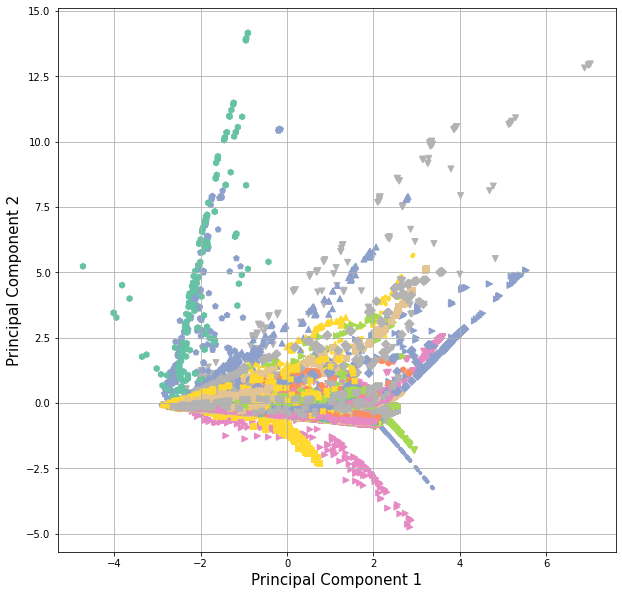

In [4]:
outputvalsname =  ['cs','coa','cod','cca','ccd','co2']#'cl',

# Separating out the features
x = df[outputvalsname]

# Separating out the target
y = df['pSet']
target = df['pSet']# pd.DataFrame(data = y , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

numComp = 2

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target] , axis = 1)
#finalDf['outlier'] = [idd in np.array([1, 8, 13, 14, 18, 26, 44, 51, 52, 62, 63, 64, 69, 72, 74, 78, 80, 83, 91, 92, 93]) 
#                      for idd in finalDf['pSet']]

numMarker=13
numCol = 8

marker_id =np.array( [[i]*numCol for i in range(numMarker)]).reshape(-1)[:99]
color_id  =np.array( [[i for i in range(numCol)]*numMarker]).reshape(-1)[:99]

pSet2mark = dict(zip(np.unique(df['pSet']), marker_id))
pSet2col = dict(zip(np.unique(df['pSet']), color_id))
markers_map = dict(zip(np.array([i for i in range(numMarker)]),marker_id))
markers_map2markers_list = dict(zip(markers_map,marker_list))


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(np.array([i for i in range(8)]),rgb_values))

finalDf['color'] = finalDf['pSet'].map(pSet2col).map(color_map)


%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

for pset in range(99):
    subset = finalDf[finalDf['pSet']==pset]
    if len(subset) > 0:
        ax.scatter(subset[ 'principal component 1']
                   , subset['principal component 2']
                   , c = subset['color'] 
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")
        if markers_map2markers_list[pSet2mark[pset]] == '^':
            print(pset,np.unique(subset['color'] ),markers_map2markers_list[pSet2mark[pset]], end=", ")

ax.grid()# the one near 30 is no 74
# 21 [(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)] ^
# 29 [(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)] ^

In [6]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

[0.50440312 0.23012379] 0.7345269162821995


In [7]:
np.unique(finalDf[finalDf['principal component 2']>7.5]['pSet'])

array([17, 21, 57, 74], dtype=object)

In [12]:
np.unique(finalDf[finalDf['principal component 2']<-1.8]['pSet'])

array([2, 14, 41, 52], dtype=object)

In [37]:
aa = [markers_map2markers_list[pSet2mark[pset]] for pset in range(99)]
print(aa)
print([aa.count(nn) for nn in marker_list])

['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', '^', '^', '^', '^', '^', '^', '^', '^', '^', '^', '<', '<', '<', '<', '<', '<', '<', '<', '<', '<', '>', '>', '>', '>', '>', '>', '>', '>', '>', '>', 's', 's', 's', 's', 's', 's', 's', 's', 's', 's', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', 'p', '*', '*', '*', '*', '*', '*', '*', '*', '*', '*', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'h', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D']
[10, 10, 10, 10, 10, 10, 10, 10, 10, 9]


In [50]:
#print([color_map[ii] for ii in range(0,10)], color_map[0],color_map[8])

# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(np.array([i for i in range(8)]),rgb_values))
color_map

{0: (0.4, 0.7607843137254902, 0.6470588235294118),
 1: (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 2: (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 3: (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 4: (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 5: (1.0, 0.8509803921568627, 0.1843137254901961),
 6: (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 7: (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)}

In [51]:
rgb_values

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [45]:
rgb_values

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

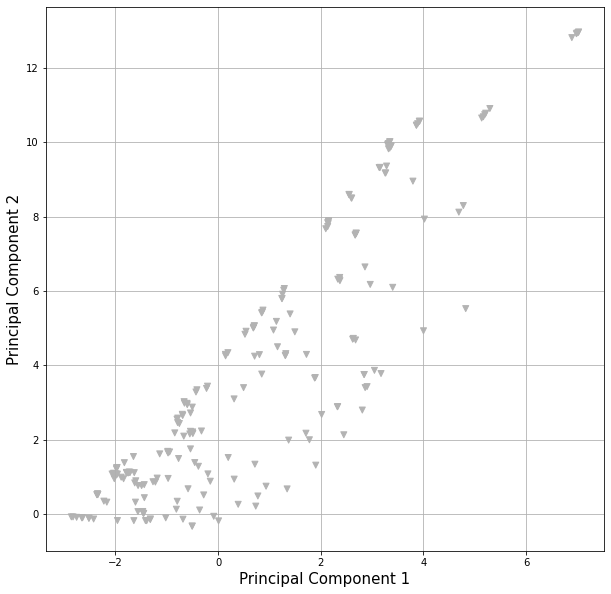

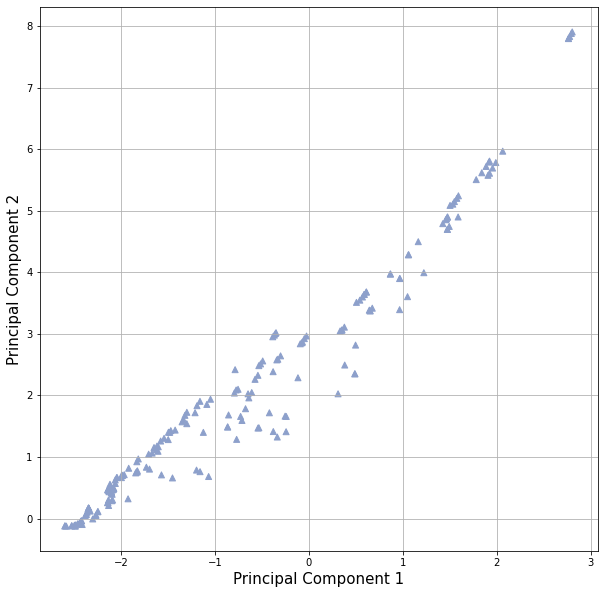

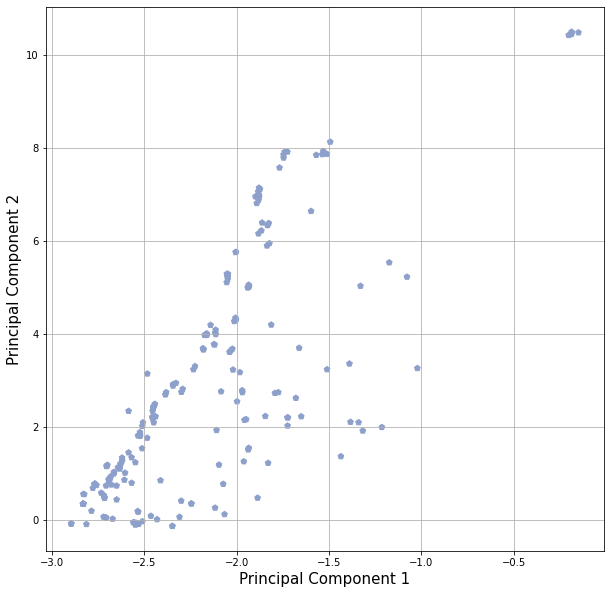

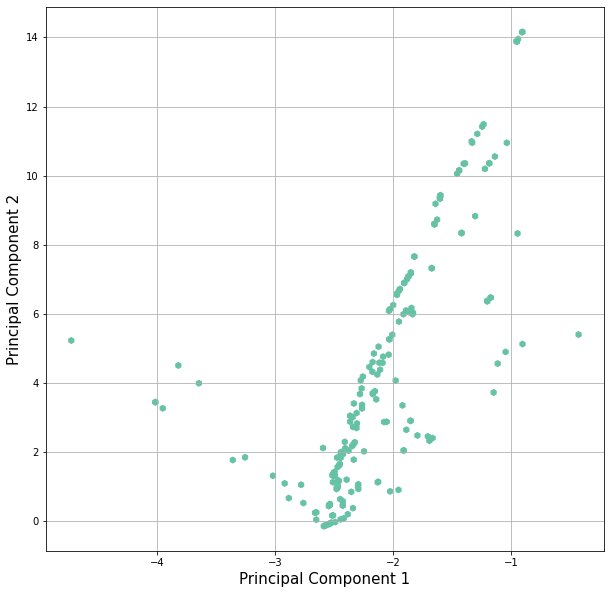

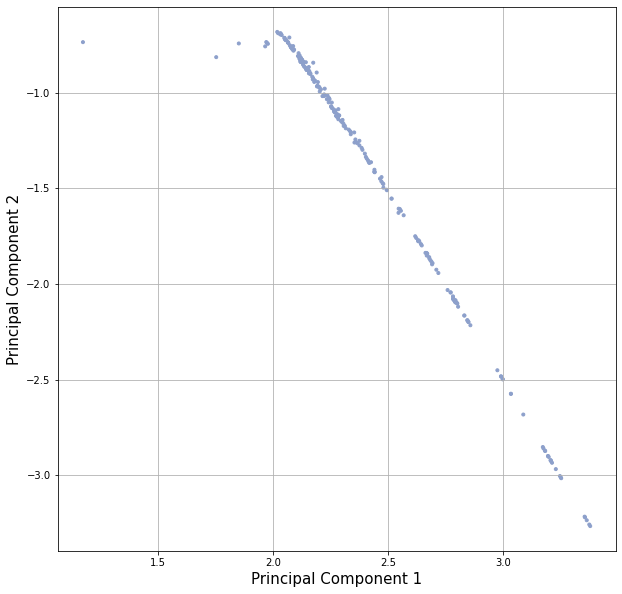

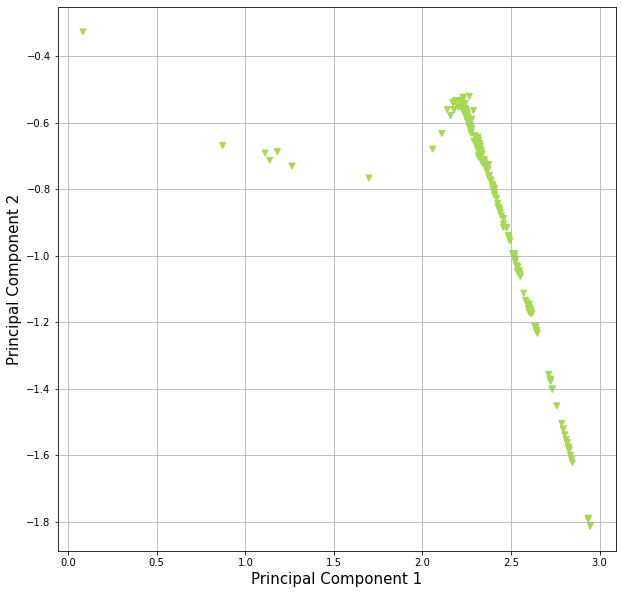

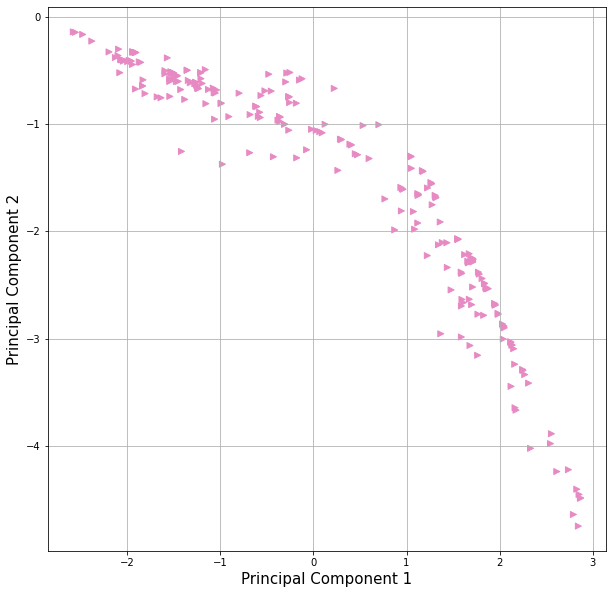

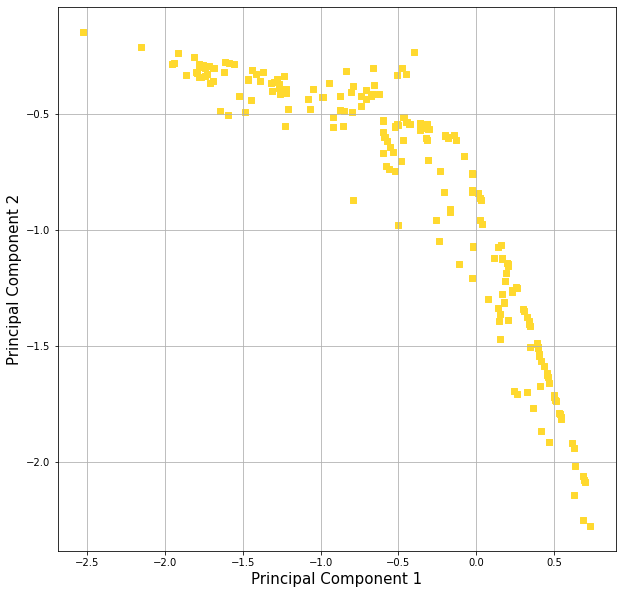

In [13]:
%matplotlib inline
for pset in np.array([17, 21, 57, 74,2, 14, 41, 52], dtype=object):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot()#projection='3d') 

    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)

    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2']
               , c = subset['color'] 
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )

    ax.grid()

18 [(0.4, 0.7607843137254902, 0.6470588235294118)] ^, 19 [(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)] ^, 21 [(0.5529411764705883, 0.6274509803921569, 0.796078431372549)] ^, 23 [(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)] ^, 24 [(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)] ^, 25 [(1.0, 0.8509803921568627, 0.1843137254901961)] ^, 26 [(0.8980392156862745, 0.7686274509803922, 0.5803921568627451)] ^, 27 [(0.7019607843137254, 0.7019607843137254, 0.7019607843137254)] ^, 18 [(0.4, 0.7607843137254902, 0.6470588235294118)] ^, 19 [(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)] ^, 21 [(0.5529411764705883, 0.6274509803921569, 0.796078431372549)] ^, 23 [(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)] ^, 24 [(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)] ^, 25 [(1.0, 0.8509803921568627, 0.1843137254901961)] ^, 26 [(0.8980392156862745, 0.7686274509803922, 0.5803921568627451)] ^, 27 [(0.7019607843137254, 

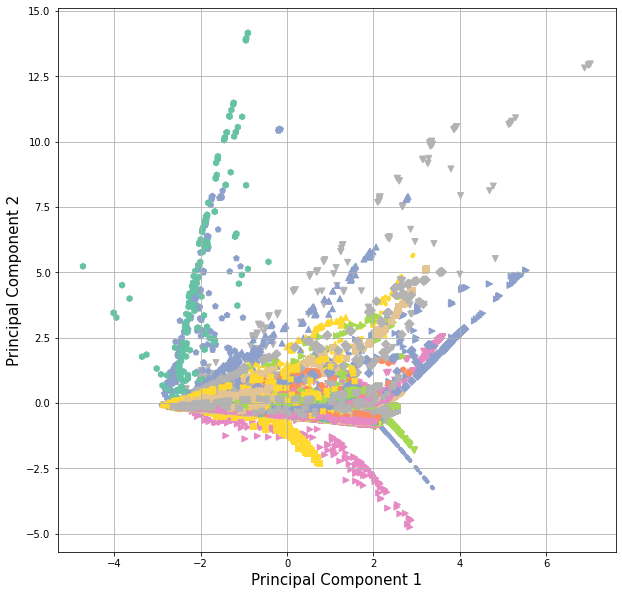

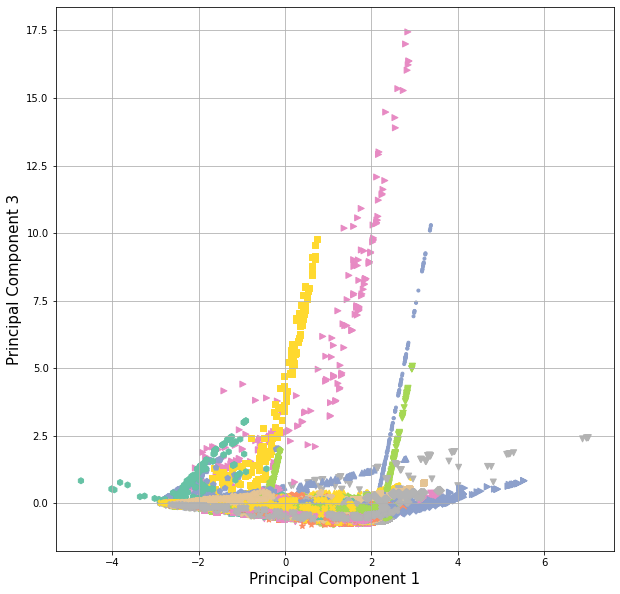

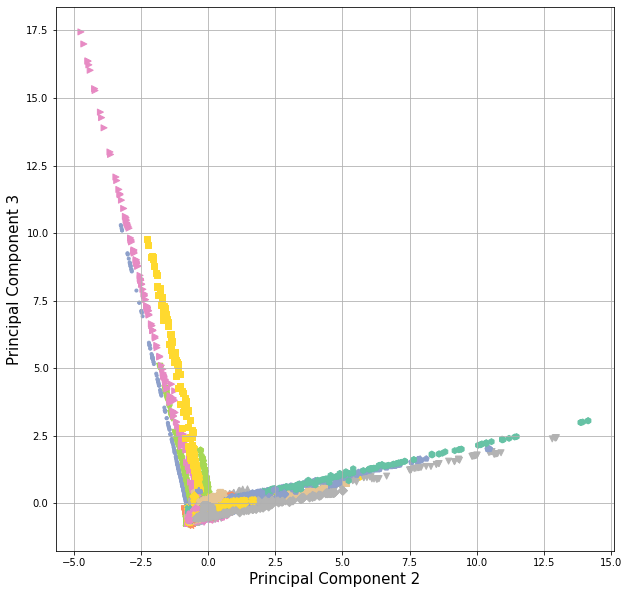

In [19]:
outputvalsname =  ['cs','coa','cod','cca','ccd','co2']#'cl',

# Separating out the features
x = df[outputvalsname]

# Separating out the target
y = df['pSet']
target = df['pSet']# pd.DataFrame(data = y , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target] , axis = 1)
#finalDf['outlier'] = [idd in np.array([1, 8, 13, 14, 18, 26, 44, 51, 52, 62, 63, 64, 69, 72, 74, 78, 80, 83, 91, 92, 93]) 
#                      for idd in finalDf['pSet']]

numMarker=13
numCol = 8

marker_id =np.array( [[i]*numCol for i in range(numMarker)]).reshape(-1)[:99]
color_id  =np.array( [[i for i in range(numCol)]*numMarker]).reshape(-1)[:99]

pSet2mark = dict(zip(np.unique(df['pSet']), marker_id))
pSet2col = dict(zip(np.unique(df['pSet']), color_id))
markers_map = dict(zip(np.array([i for i in range(numMarker)]),marker_id))
markers_map2markers_list = dict(zip(markers_map,marker_list))


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(np.array([i for i in range(8)]),rgb_values))

finalDf['color'] = finalDf['pSet'].map(pSet2col).map(color_map)


%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

for pset in range(99):
    subset = finalDf[finalDf['pSet']==pset]
    if len(subset) > 0:
        ax.scatter(subset[ 'principal component 1']
                   , subset['principal component 2']
                   , c = subset['color'] 
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")
        if markers_map2markers_list[pSet2mark[pset]] == '^':
            print(pset,np.unique(subset['color'] ),markers_map2markers_list[pSet2mark[pset]], end=", ")

ax.grid()# the one near 30 is no 74

%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

for pset in range(99):
    subset = finalDf[finalDf['pSet']==pset]
    if len(subset) > 0:
        ax.scatter(subset[ 'principal component 1']
                   , subset['principal component 3']
                   , c = subset['color'] 
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")
        if markers_map2markers_list[pSet2mark[pset]] == '^':
            print(pset,np.unique(subset['color'] ),markers_map2markers_list[pSet2mark[pset]], end=", ")

ax.grid()# the one near 30 is no 74

%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()#projection='3d') 
        
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

for pset in range(99):
    subset = finalDf[finalDf['pSet']==pset]
    if len(subset) > 0:
        ax.scatter(subset[ 'principal component 2']
                   , subset['principal component 3']
                   , c = subset['color'] 
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")
        if markers_map2markers_list[pSet2mark[pset]] == '^':
            print(pset,np.unique(subset['color'] ),markers_map2markers_list[pSet2mark[pset]], end=", ")

ax.grid()# the one near 30 is no 74

In [35]:
aa =np.sort( np.unique(finalDf[finalDf['principal component 3']>5]['pSet']))
print(aa)

[2 14 41 52]


In [20]:

%matplotlib qt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
if False:
    ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 2']
           , finalDf['principal component 3']
           , c = finalDf['pSet']#.map(color_map)
           )

for pset in range(99):
    subset = finalDf[finalDf['pSet']==pset]
    if len(subset) > 0:
        ax.scatter(subset[ 'principal component 1'] 
                   , subset['principal component 2'] 
               , subset['principal component 3']
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   #, finalDf['principal component 3']
                   , c =  subset['color'] 
                   )

ax.grid()

In [21]:

%matplotlib qt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
if False:
    ax.scatter(finalDf[ 'principal component 1']
           , finalDf['principal component 2']
           , finalDf['principal component 3']
           , c = finalDf['pSet']#.map(color_map)
           )

for pset in range(99):
    subset = finalDf[finalDf['pSet']==pset]
    if ( len(subset) > 0) and (pset not in  np.array([17, 21, 57, 74,2, 14, 41, 52], dtype=object)):
        ax.scatter(subset[ 'principal component 1'] 
                   , subset['principal component 2'] 
               , subset['principal component 3']
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   #, finalDf['principal component 3']
                   , c =  subset['color'] 
                   )

ax.grid()

18 [(0.4, 0.7607843137254902, 0.6470588235294118)] ^, 19 [(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)] ^, 21 [(0.5529411764705883, 0.6274509803921569, 0.796078431372549)] ^, 23 [(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)] ^, 24 [(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)] ^, 25 [(1.0, 0.8509803921568627, 0.1843137254901961)] ^, 26 [(0.8980392156862745, 0.7686274509803922, 0.5803921568627451)] ^, 27 [(0.7019607843137254, 0.7019607843137254, 0.7019607843137254)] ^, 18 [(0.4, 0.7607843137254902, 0.6470588235294118)] ^, 19 [(0.9882352941176471, 0.5529411764705883, 0.3843137254901961)] ^, 21 [(0.5529411764705883, 0.6274509803921569, 0.796078431372549)] ^, 23 [(0.9058823529411765, 0.5411764705882353, 0.7647058823529411)] ^, 24 [(0.6509803921568628, 0.8470588235294118, 0.32941176470588235)] ^, 25 [(1.0, 0.8509803921568627, 0.1843137254901961)] ^, 26 [(0.8980392156862745, 0.7686274509803922, 0.5803921568627451)] ^, 27 [(0.7019607843137254, 

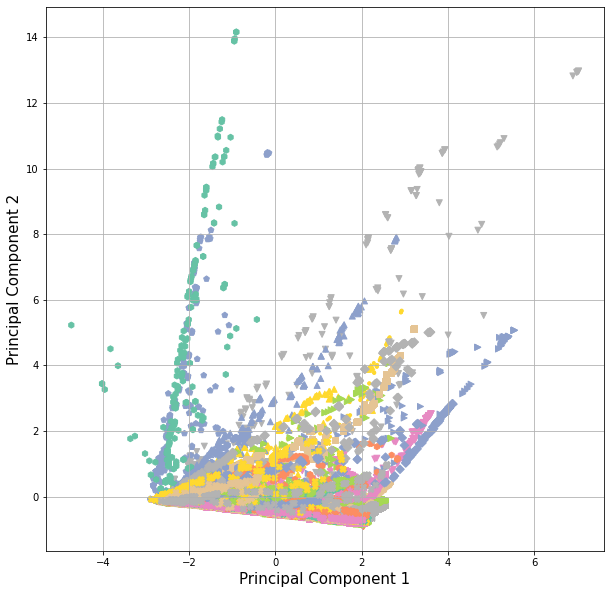

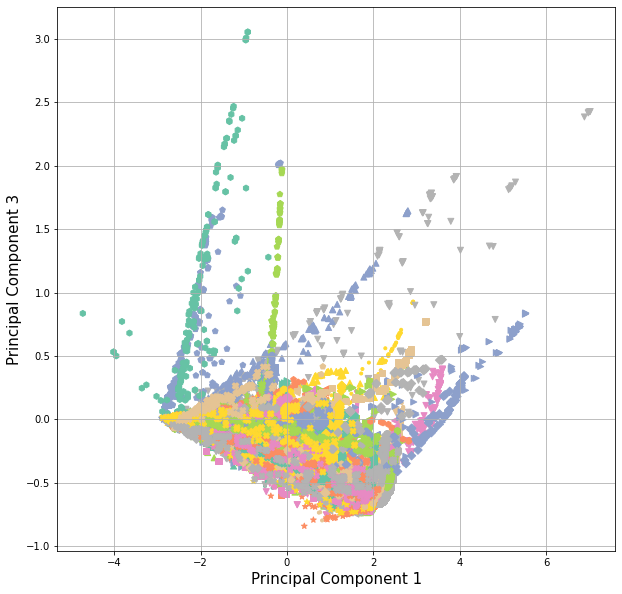

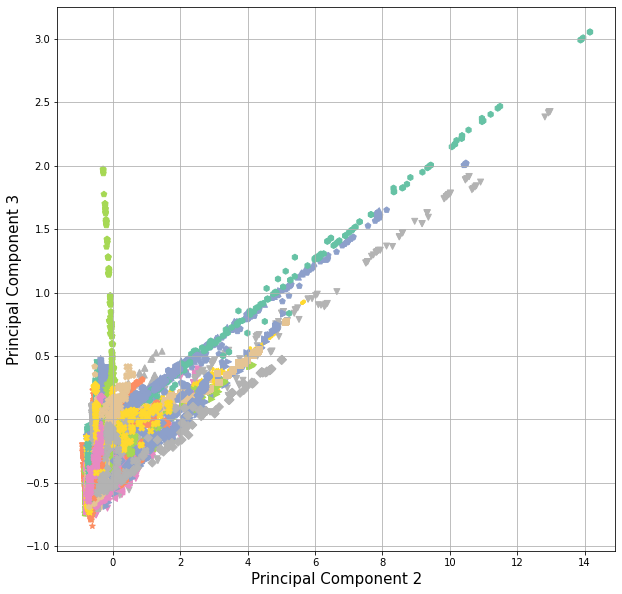

In [37]:
outputvalsname =  ['cs','coa','cod','cca','ccd','co2']#'cl',
takeOut =[2, 14, 41 ,52]# [2, 14, 17 ,41 ,52, 57 ,59, 74]

# Separating out the features
x = df[outputvalsname]

# Separating out the target
y = df['pSet']
target = df['pSet']# pd.DataFrame(data = y , columns = ['pSet_id'])

# Standardizing the features
x = StandardScaler().fit_transform(x)

numComp = 3

pca = PCA(n_components=numComp)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component '+str(i+1) for i in range(numComp)])


finalDf = pd.concat([principalDf, target] , axis = 1)
#finalDf['outlier'] = [idd in np.array([1, 8, 13, 14, 18, 26, 44, 51, 52, 62, 63, 64, 69, 72, 74, 78, 80, 83, 91, 92, 93]) 
#                      for idd in finalDf['pSet']]

numMarker=13
numCol = 8

marker_id =np.array( [[i]*numCol for i in range(numMarker)]).reshape(-1)[:99]
color_id  =np.array( [[i for i in range(numCol)]*numMarker]).reshape(-1)[:99]

pSet2mark = dict(zip(np.unique(df['pSet']), marker_id))
pSet2col = dict(zip(np.unique(df['pSet']), color_id))
markers_map = dict(zip(np.array([i for i in range(numMarker)]),marker_id))
markers_map2markers_list = dict(zip(markers_map,marker_list))


# List of colors in the color palettes
rgb_values = sns.color_palette("Set2", 8)
color_map = dict(zip(np.array([i for i in range(8)]),rgb_values))

finalDf['color'] = finalDf['pSet'].map(pSet2col).map(color_map)


%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

for pset in range(99):
    subset = finalDf[finalDf['pSet']==pset]
    if ( len(subset) > 0) and (pset not in takeOut):
        ax.scatter(subset[ 'principal component 1']
                   , subset['principal component 2']
                   , c = subset['color'] 
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")
        if markers_map2markers_list[pSet2mark[pset]] == '^':
            print(pset,np.unique(subset['color'] ),markers_map2markers_list[pSet2mark[pset]], end=", ")

ax.grid()# the one near 30 is no 74

%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()#projection='3d') 
        
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

for pset in range(99):
    subset = finalDf[finalDf['pSet']==pset]
    if ( len(subset) > 0) and (pset not in takeOut):
        ax.scatter(subset[ 'principal component 1']
                   , subset['principal component 3']
                   , c = subset['color'] 
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")
        if markers_map2markers_list[pSet2mark[pset]] == '^':
            print(pset,np.unique(subset['color'] ),markers_map2markers_list[pSet2mark[pset]], end=", ")

ax.grid()# the one near 30 is no 74

%matplotlib inline
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()#projection='3d') 
        
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)

for pset in range(99):
    subset = finalDf[finalDf['pSet']==pset]
    if ( len(subset) > 0) and (pset not in takeOut):
        ax.scatter(subset[ 'principal component 2']
                   , subset['principal component 3']
                   , c = subset['color'] 
                   , marker= markers_map2markers_list[pSet2mark[pset]]
                   )
        #print(pset,markers_map2markers_list[pSet2mark[pset]], end=", ")
        if markers_map2markers_list[pSet2mark[pset]] == '^':
            print(pset,np.unique(subset['color'] ),markers_map2markers_list[pSet2mark[pset]], end=", ")

ax.grid()# the one near 30 is no 74

[2 14 17 41 52 57 59 74]


In [30]:
print(pca.explained_variance_ratio_,sum(pca.explained_variance_ratio_))

[0.50440312 0.23012379 0.16088387] 0.8954107879415927


In [ ]:
%matplotlib inline
for pset in np.array([17, 21, 57, 74,2, 14, 41, 52], dtype=object):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot()#projection='3d') 

    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)

    subset = finalDf[finalDf['pSet']==pset]
    ax.scatter(subset[ 'principal component 1']
               , subset['principal component 2']
               , c = subset['color'] 
               , marker= markers_map2markers_list[pSet2mark[pset]]
               )

    ax.grid()